### Data Visualization on Exchange Rates- Storytelling

#### Background:
The euro officially launched in 1999 when 11 EU countries fixed their exchange rates and transferred monetary policy to the European Central Bank. Now over 20 years old, the euro’s foreign exchange reference rates—reflecting the value of one currency against another—are updated daily around 16:00 CET, excluding TARGET closing days. The dataset includes historical euro exchange rates for various global currencies, some of which no longer exist due to euro adoption, such as the Cypriot pound, Greek drachma, and Slovenian tolar. Since 2002, the Bulgarian lev has been pegged to the euro at a fixed rate of 1 € = 1.9558 leva.

#### Purpose of The Project: 

- Use storytelling to visualize the data on the Euro to dollar daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

Source of the dataset is from [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

# Set better dpi displays on larger screen resolutions
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Tahoma'

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2025-04-02               1.7146           1.9558            6.1212   
1   2025-04-01               1.7255           1.9558            6.1679   
2   2025-03-31               1.7318           1.9558            6.2507   
3   2025-03-28                1.712           1.9558            6.2252   
4   2025-03-27               1.7101           1.9558            6.2154   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5479         0.9543                   7.8529              NaN   
1             1.5529          0.952                   7.8431              NaN   
2             1.5533         0.9531                   7.8442              NaN   
3             1.5444         0.9525                   7.8445              NaN   
4             1.5425         0.9524                   7.8361              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
print(exchange_rates.tail())

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
6780   1999-01-08               1.8406              NaN               NaN   
6781   1999-01-07               1.8474              NaN               NaN   
6782   1999-01-06               1.8820              NaN               NaN   
6783   1999-01-05               1.8944              NaN               NaN   
6784   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
6780             1.7643         1.6138                      NaN   
6781             1.7602         1.6165                      NaN   
6782             1.7711         1.6116                      NaN   
6783             1.7965         1.6123                      NaN   
6784             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
6780          0.58187          34.938          7.4433  .

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6785 non-null   object 
 1   [Australian dollar ]      6785 non-null   object 
 2   [Bulgarian lev ]          6383 non-null   object 
 3   [Brazilian real ]         6517 non-null   object 
 4   [Canadian dollar ]        6785 non-null   object 
 5   [Swiss franc ]            6785 non-null   object 
 6   [Chinese yuan renminbi ]  6517 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6785 non-null   object 
 9   [Danish krone ]           6785 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6785 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6785 non-null   object 
 14  [Croatia

There are `41 columns and 6785 rows` in the exchange_rates dataset, there are null values present in sixteen of the columns beacause their count is <6785, some of them include `Turkisk lira, Slovak koruna, Slovenian tolar, Maltese lira, Israeli skekel, Greek drachma, Brazilian real etc.`
The data column is a mixture of `object and float datatypes`, there are three float dtypes and 38 object dtypes.

### Data Cleaning

To start with, the raw dataset needs to be cleaned before visualization. The focus will largerly be on the American Dollar and Euro. 

The following steps will be carried out to clean the dataset:
- Rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
- Change the Time column to a datetime data type.
- Sort the values by Time in ascending order.
- Reset the index (and drop the initial index).

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['US_dollar', 'Time']]

In [6]:
print(euro_to_dollar)

     US_dollar       Time
0       1.1789 1999-01-04
1       1.1790 1999-01-05
2       1.1743 1999-01-06
3       1.1632 1999-01-07
4       1.1659 1999-01-08
...        ...        ...
6780    1.0785 2025-03-27
6781    1.0797 2025-03-28
6782    1.0815 2025-03-31
6783    1.0788 2025-04-01
6784    1.0803 2025-04-02

[6785 rows x 2 columns]


In [7]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.0867     8
1.0888     8
          ..
1.1959     1
0.9826     1
0.9843     1
1.2360     1
1.2322     1
Name: US_dollar, Length: 3837, dtype: int64

After running the `euro_to_dollar['US_dollar'].value_counts()` it was observed that the value counts, one of the displayed values was `-` which had a total count of 62, this implies that there are missing values in the dataset. Hence, the dataset needs to be cleaned by removing the missing values.

In [8]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-'] # Drop the missing values

In [9]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar['US_dollar'].dtype

dtype('float64')

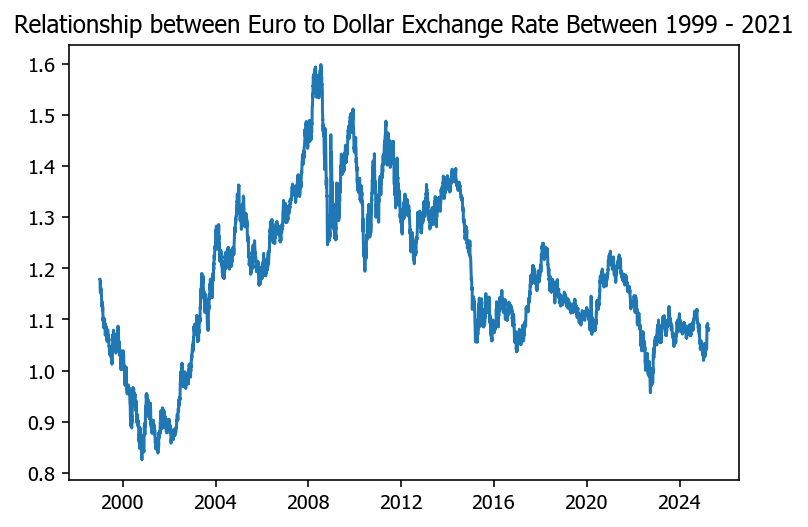

In [10]:
plt.plot (euro_to_dollar['Time'], euro_to_dollar['US_dollar']) # Create a line plot to show how the variations in the exchange rate overtime
plt.title('Relationship between Euro to Dollar Exchange Rate Between 1999 - 2021')
plt.show()

### Rolling Mean
With the data now cleaned, a line plot will be generated to visualize how the euro-dollar exchange rate has changed over time. However, due to how large the dataset is, the line shape of the plot will have a lot of wiggles because of the daily variation in the exchange rate which will affect the visual representation of the data. Therefore, to focus on long-term trends and reduce short-term fluctuations, a rolling mean (or moving average) can be applied.

In [11]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean() #calculate the rolling mean of the US_dollar column
euro_to_dollar['rolling_mean']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6780    1.068030
6781    1.069093
6782    1.070233
6783    1.071370
6784    1.072600
Name: rolling_mean, Length: 6723, dtype: float64

### Coming Up With An Idea For The Data Visualization Storytelling
The aim is to create a storytelling data visualization using the available data. To build a narrative, the data should be arranged as a sequence of events that highlight change over time.

Here are some suggested storylines:

- Illustrate how the euro-dollar exchange rate shifted during the coronavirus pandemic by focusing on 2020 data, with 2016–2019 serving as a baseline, using a line plot.

- Highlight changes in the euro-dollar rate during the 2007–2008 financial crisis, with data from 2006 and 2009 included for context, using a line plot.

- Compare how the euro-dollar rate evolved during the terms of the last three U.S. presidents—George W. Bush (2001–2009), Barack Obama (2009–2017), and Donald Trump (2017–2021)—using a line plot.

`Of the suggested storylines, illustrating how the euro-dollar exchange rate shifted during the coronavirus pandemic by focusing on 2020 data, with 2016–2019 serving as a baseline, using a line plot will be the storyline of choice.`

### Skething A Graph

The first step is selecting an appropriate graph type—one that effectively supports the narrative. For time series data, a line plot is more suitable than a histogram, as it clearly shows how values change over time. It's also important to choose a format that will be familiar and intuitive for the intended audience. For simplicity, any audience can be selected.

This initial sketching phase benefits from applying key design principles: maximizing the data-ink ratio, using Gestalt principles to form visual patterns, and directing the viewer’s attention through pre-attentive attributes. These principles not only inspire a range of design possibilities but also help in selecting the most effective option for communicating the story.

In [12]:
# Filter out the baseline period (2016 & 2019) and pandemic period
euro_to_dollar = euro_to_dollar.copy()
pre_pandemic_crisis= euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2016) & (euro_to_dollar['Time'].dt.year <=2019)]
pandemic_crisis = euro_to_dollar[euro_to_dollar['Time'].dt.year == 2020]

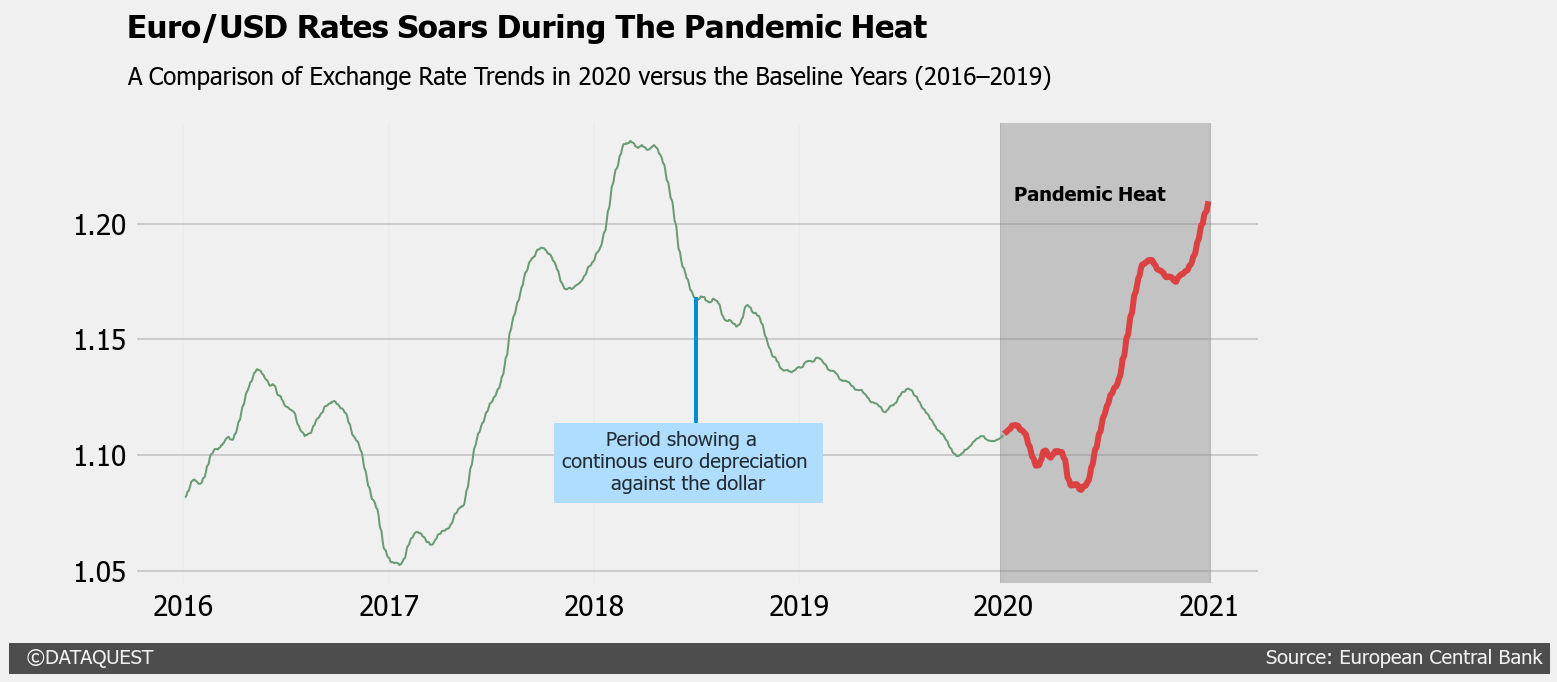

In [13]:
position = 16700
# Using the FiveThirtyEight style 
style.use('fivethirtyeight')
fig,ax = plt.subplots (figsize=(9,4))
ax.plot (pre_pandemic_crisis['Time'], pre_pandemic_crisis['rolling_mean'], linewidth=1, color='#689b74')

#Highlighting the pandemic period
ax.plot (pandemic_crisis['Time'], pandemic_crisis['rolling_mean'],linewidth=3, color='#db4141')

# Graph title
ax.text(position,1.28, 'Euro/USD Rates Soars During The Pandemic Heat', size= 16, weight ='bold' )
ax.text(position,1.26, 'A Comparison of Exchange Rate Trends in 2020 versus the Baseline Years (2016–2019)', size= 12 )
# ax.text()
ax.text(16500, 1.01, '  ©DATAQUEST' + ' '*178 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)
ax.text(18280, 1.21, 'Pandemic Heat', size= 10, weight='bold', style= 'italic')
ax.axvspan(18255, 18630, alpha= 0.4, color='gray')
ax.axvline(17715.0, 0.35, 0.62, linewidth= 2.0)
ax.text(17700, 1.085, 'Period showing a  \ncontinous euro depreciation \nagainst the dollar', size=10, ha='center',backgroundcolor='#AFDDFF',alpha= 0.8)
ax.grid(alpha= 0.1, axis="x")
plt.show()

### Summary of the Euro/USD Exchange Rate Trends (2016–2020)

The line plot illustrates the trends in the Euro to US Dollar (EUR/USD) exchange rate from 2016 through early 2020. Between 2016 and 2019, the exchange rate exhibited fluctuating behavior, with periods of both appreciation and depreciation. Notably, there was a sustained phase of euro depreciation against the dollar around 2018, highlighted by a significant downward trend.

However, starting in early 2020, during the period marked as the "Pandemic Heat," the trend shifted dramatically. The euro began to strengthen sharply against the US dollar, showing a steep and consistent upward trajectory through 2020. In 2020, the euro appreciated against the U.S. dollar due to several key factors. The American economy was hit hard by the COVID-19 pandemic, leading to a decline in investor confidence in the dollar. At the same time, the U.S. Federal Reserve took aggressive action by cutting interest rates to near zero and implementing large-scale stimulus measures, which increased the money supply and weakened the dollar's value. [Reference](https://www.ecb.europa.eu)

Meanwhile, the European Union launched a major recovery plan, including a €750 billion stimulus package, boosting optimism about the eurozone's economic future. As global markets began to stabilize, investors grew more willing to move away from the traditionally "safe" dollar toward other assets, including the euro. Additionally, political uncertainty in the United States, especially surrounding the 2020 presidential election, added further downward pressure on the dollar. [Reference](https://www.ecb.europa.eu)

This surge contrasts sharply with the baseline years, emphasizing the significant impact the COVID-19 pandemic had on currency markets.
